# 0. Introduction

Example based on: Deep Learning with Python by Francois Chollet:
https://www.manning.com/books/deep-learning-with-python

###Remember: change your runtime to GPU! 

In [9]:
!pip install tensorflow
!pip install keras

     |████████████████████████████████| 86.3MB 202kB/s eta 0:00:01    |█▍                              | 3.8MB 1.5MB/s eta 0:00:55     |████████████████████▎           | 54.7MB 1.6MB/s eta 0:00:20     |██████████████████████▉         | 61.5MB 217kB/s eta 0:01:55     |███████████████████████         | 61.9MB 217kB/s eta 0:01:53
     |████████████████████████████████| 450kB 483kB/s eta 0:00:01
     |████████████████████████████████| 71kB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 352kB/s eta 0:00:01
     |████████████████████████████████| 61kB 1.1MB/s eta 0:00:011
     |████████████████████████████████| 2.4MB 515kB/s eta 0:00:01
     |████████████████████████████████| 112kB 977kB/s eta 0:00:01
     |████████████████████████████████| 81kB 1.9MB/s eta 0:00:011
     |████████████████████████████████| 327kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 92kB 2.7MB/s eta 0:00:011
     |██████

  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=db0306becf468e6709a6330ed2dfe3ef1828eaa0e4210636f7627d235ca968ca
  Stored in directory: /home/daanvdr/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for absl-py: filename=absl_py-0.8.1-cp37-none-any.whl size=121167 sha256=3d1ad3759ba3a511d8bc4708ecc6446076b03cdc889f6e9d254054f2421d6cda
  Stored in directory: /home/daanvdr/.cache/pip/wheels/a7/15/a0/0a0561549ad11cdc1bc8fa1191a353efd30facf6bfb507aefc
Successfully built opt-einsum termcolor gast absl-py


In [12]:
import keras
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load data

The MNIST database of handwritten digit has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


# 2. Inspect data

Try to get a feel for the data you are using to train and test your neural network. 

## Training data

- Training data will be used to train our neural network to recognize hand-written digits.
- MNIST provides 60000 labeled training images, each 28x28 pixels

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_labels.shape

(60000,)

In [16]:
def show_image(images, labels, index):
    img = images[index].reshape((28,28))
    label = labels[index]
    plt.imshow(img)
    plt.title(label)
    plt.show()

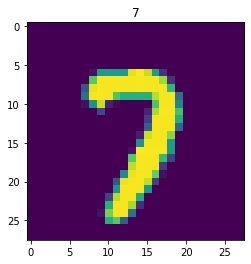

In [20]:
show_image(train_images, train_labels, 1300)

## Test data

- Test data will be used to validate how good our network performs on data it has never seen.
- MNIST provides 10000 test images, each 28x28.
- It's important to note that these should never be used in the training cycle. A 'test set' should never contain images the network has already seen during training. (read more: [Model Selection and Train/Validation/Test Sets](https://www.coursera.org/lecture/machine-learning/model-selection-and-train-validation-test-sets-QGKbr) and [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/))

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
test_labels.shape

(10000,)

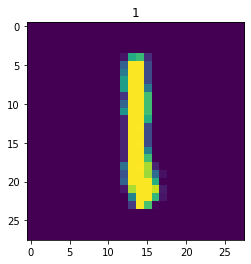

In [23]:
show_image(test_images, test_labels, 168)

# 3. Network architecture

Define the network architecture that will be used for training

- how many layers 
- which type of layer
- how many nodes in each layer
- activation function in each layer


In [24]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# The final layer has 10 nodes, each node represents one class of numbers
network.add(layers.Dense(10, activation='softmax'))

# 4. Compilation Step

In the compilation step we define the:

- the loss function
- the optimizer
- the evaluation metric

In [25]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# 5. Data Preparation

Before feeding the data into the network for training, we make sure it is formatted properly.

## Prepare the images

### Reshape the images to vectors of integers

In [26]:
train_images_reshaped = train_images.reshape((60000, 28*28))
test_images_reshaped = test_images.reshape((10000, 28*28))

In [27]:
train_images_reshaped.shape

(60000, 784)

### Resize the values to a value between 0 and 1

In [28]:
train_images_transformed = train_images_reshaped.astype('float32') / 255
test_images_transformed = test_images_reshaped.astype('float32') / 255

## Prepare the labels (one hot encoding)

In [29]:
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [30]:
train_labels_categorical[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 6. Network summary
(28*28 = 784 --> first layer are 512 neurons, all with a bias --> 784*512+512 = 401.920 parameters)

In [31]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# 7. Train the network

Feed the training images and labels to the network.

Two additional parameters need to be supplied:

- epochs: how many times the network will look at the entire dataset. 
- batch_size: how many images will be put through the network at one time.

In [32]:
history = network.fit(train_images_transformed, train_labels_categorical, validation_split=0.33, epochs=5, batch_size=128)

Train on 40199 samples, validate on 19801 samples
Epoch 1/5
40199/40199 [==============================] - 3s 82us/step - loss: 0.3057 - accuracy: 0.9123 - val_loss: 0.2202 - val_accuracy: 0.9327
Epoch 2/5
40199/40199 [==============================] - 3s 80us/step - loss: 0.1287 - accuracy: 0.9619 - val_loss: 0.1453 - val_accuracy: 0.9561
Epoch 3/5
40199/40199 [==============================] - 3s 77us/step - loss: 0.0824 - accuracy: 0.9752 - val_loss: 0.1203 - val_accuracy: 0.9619
Epoch 4/5
40199/40199 [==============================] - 3s 72us/step - loss: 0.0587 - accuracy: 0.9825 - val_loss: 0.0964 - val_accuracy: 0.9712
Epoch 5/5
40199/40199 [==============================] - 3s 75us/step - loss: 0.0429 - accuracy: 0.9878 - val_loss: 0.0918 - val_accuracy: 0.9741


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


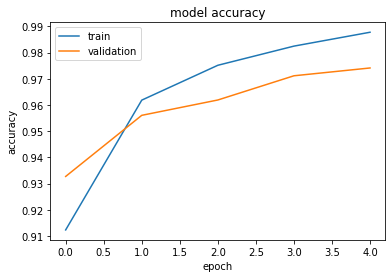

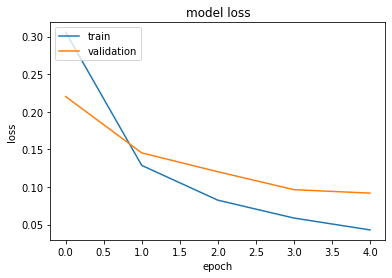

In [34]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 8. Test the network

Use the test set (which the network has not seen yet) to test how well the network will perform on images it has not seen yet:

In [35]:
test_loss, test_acc = network.evaluate(test_images_transformed, test_labels_categorical)

10000/10000 [==============================] - 1s 54us/step


In [36]:
print('test_acc; ', test_acc)

test_acc;  0.9782000184059143
